In [1]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
DB_PATH = '../hacker-news/hn-sqlite-20230420.db'
conn = sqlite3.connect(DB_PATH)
stories = pd.read_sql_query("SELECT * FROM items WHERE type='story'", conn)
users = pd.read_sql_query("SELECT * FROM users", conn)
conn.close()

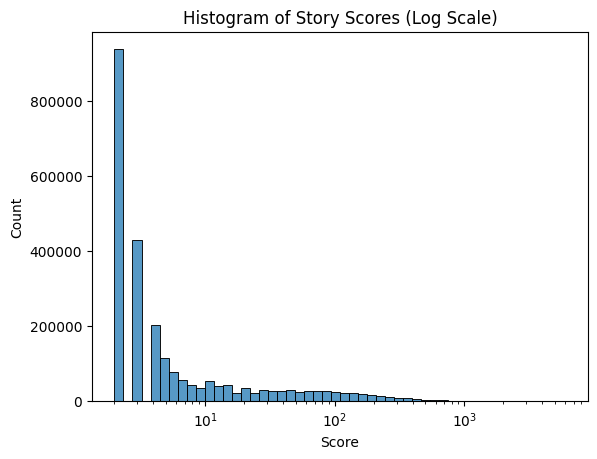

In [16]:
plt.figure()
filtered_stories = stories.loc[stories['score'] > 1]
sns.histplot(data=filtered_stories, x='score', bins=50, log_scale=True)
plt.title('Histogram of Story Scores (Log Scale)')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

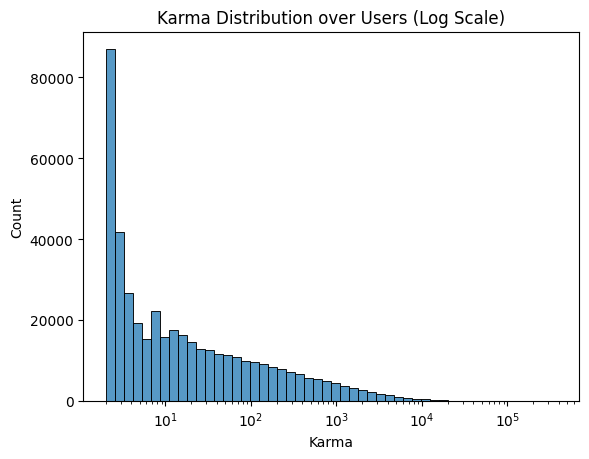

In [17]:
plt.figure()
filtered_users = users.loc[users['karma'] > 1]
sns.histplot(data=filtered_users, x='karma', bins=50, log_scale=True)
plt.title('Karma Distribution over Users (Log Scale)')
plt.xlabel('Karma')
plt.ylabel('Count')
plt.show()

/home/anant/.pyenv/versions/3.11.2/lib/python3.11/site-packages/pandas/core/tools/datetimes.py:557: RuntimeWarning: invalid value encountered in cast
  arr, tz_parsed = tslib.array_with_unit_to_datetime(arg, unit, errors=errors)


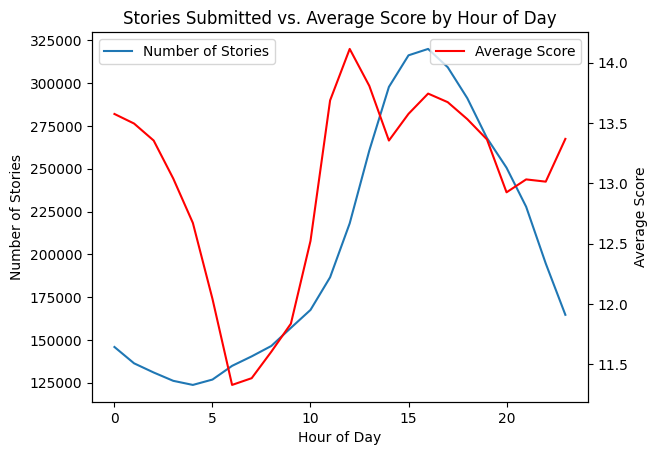

In [18]:
stories['time'] = pd.to_datetime(stories['time'], unit='s')
stories['hour'] = stories['time'].dt.hour
grouped_stories = stories.groupby('hour').agg({'id': 'count', 'score': 'mean'}).reset_index()
grouped_stories.columns = ['Hour', 'Number of Stories', 'Average Score']

plt.figure()
sns.lineplot(data=grouped_stories, x='Hour', y='Number of Stories', label='Number of Stories')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Stories')
plt.twinx()
sns.lineplot(data=grouped_stories, x='Hour', y='Average Score', color='r', label='Average Score')
plt.ylabel('Average Score')
plt.title('Stories Submitted vs. Average Score by Hour of Day')
plt.legend(loc='best')
plt.show()


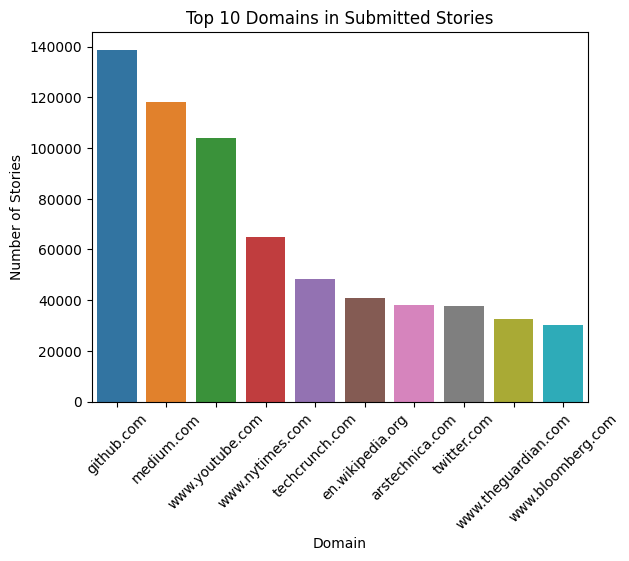

In [19]:
from urllib.parse import urlparse

stories['domain'] = stories['url'].apply(lambda x: urlparse(x).netloc if x else None)
top_domains = stories['domain'].value_counts().head(10)

plt.figure()
sns.barplot(x=top_domains.index, y=top_domains.values)
plt.title('Top 10 Domains in Submitted Stories')
plt.xlabel('Domain')
plt.ylabel('Number of Stories')
plt.xticks(rotation=45)
plt.show()

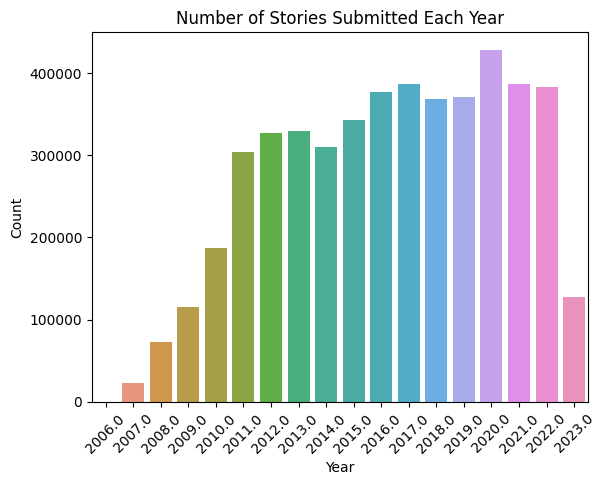

In [20]:
stories['time'] = pd.to_datetime(stories['time'], unit='s')
story_count_by_year = stories.groupby(stories['time'].dt.year)['id'].count()
plt.figure()
sns.barplot(x=story_count_by_year.index, y=story_count_by_year.values)
plt.title('Number of Stories Submitted Each Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

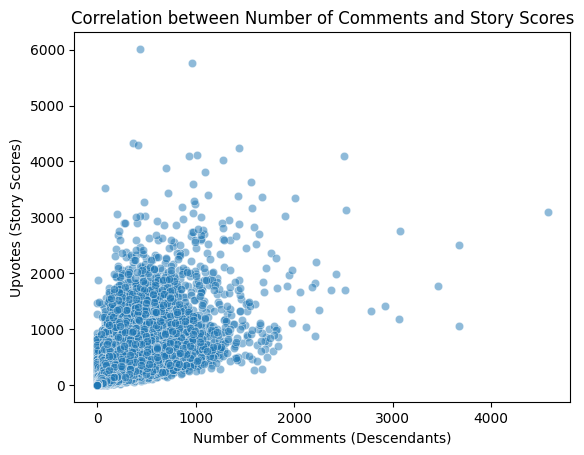

In [24]:
plt.figure()
sns.scatterplot(data=stories, x='descendants', y='score', alpha=0.5)
plt.title('Correlation between Number of Comments and Story Scores')
plt.xlabel('Number of Comments (Descendants)')
plt.ylabel('Upvotes (Story Scores)')
plt.show()

In [29]:
# What are those outliers?

sorted_by_score = stories.sort_values(by=['score', 'descendants'], ascending=[False, True])
sorted_by_descendants = stories.sort_values(by=['descendants', 'score'], ascending=[False, True])

most_upvotes_least_comments = sorted_by_score.iloc[0]
most_comments_least_upvotes = sorted_by_descendants.iloc[0]

print("Story with the most upvotes but the least comments:")
print(most_upvotes_least_comments.title)
print("https://news.ycombinator.com/item?id="+str(most_upvotes_least_comments.id))

print("\nStory with the most comments but the least upvotes:")
print(most_comments_least_upvotes.title)
print("https://news.ycombinator.com/item?id="+str(most_comments_least_upvotes.id))

Story with the most upvotes but the least comments:
Stephen Hawking has died
https://news.ycombinator.com/item?id=16582136

Story with the most comments but the least upvotes:
Biden wins White House, vowing new direction for divided U.S.
https://news.ycombinator.com/item?id=25015967
